<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import numpy as np
import os 
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing the Dataset


In [2]:
beans=pd.read_csv("drybeans.csv")

# 1. About the Data


In [3]:
beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


AREA: The area and number of pixels within the bean's boundaries.<br><br>
PERIMETER:Length of bean border.<br><br>
MAJORAXISLENGTH: The length of the longest line that can be drawn on the bean.<br><br>
ASPECTRATIO:Ratio between length and width.<br><br>
MNIORAXISLENGTH:The length of longest line that can be drawn perpendicular to the main axis of the bean.<br><br>
ASPECTRATIO:Ratio between length and width.<br><br>
ECCENTRICITY:Eccentricity of the ellipse.<br><br>
CONVEXAREA:Number of pixels in the smallest convex polygon containing the bean.<br><br>
EQUIVDIAMETER:The diameter of a circle having the same area as the bean's area.<br><br>
EXTENT:The ratio of the pixels in the bounding box to the bean area.<br><br>
SOLIDITY:Convexity of the bean.<br><br>
ROUNDNESS:Measures the  roundness of the bean<br><br>
COMPACTNESS:Compactness of the bean<br><br>
SHAPEFACTORS:SHAPEFACTOR1,SHAPEFACTOR2,SHAPEFACTOR3, SHAPEFACTOR4<br><br>
CLASS:Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira 

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

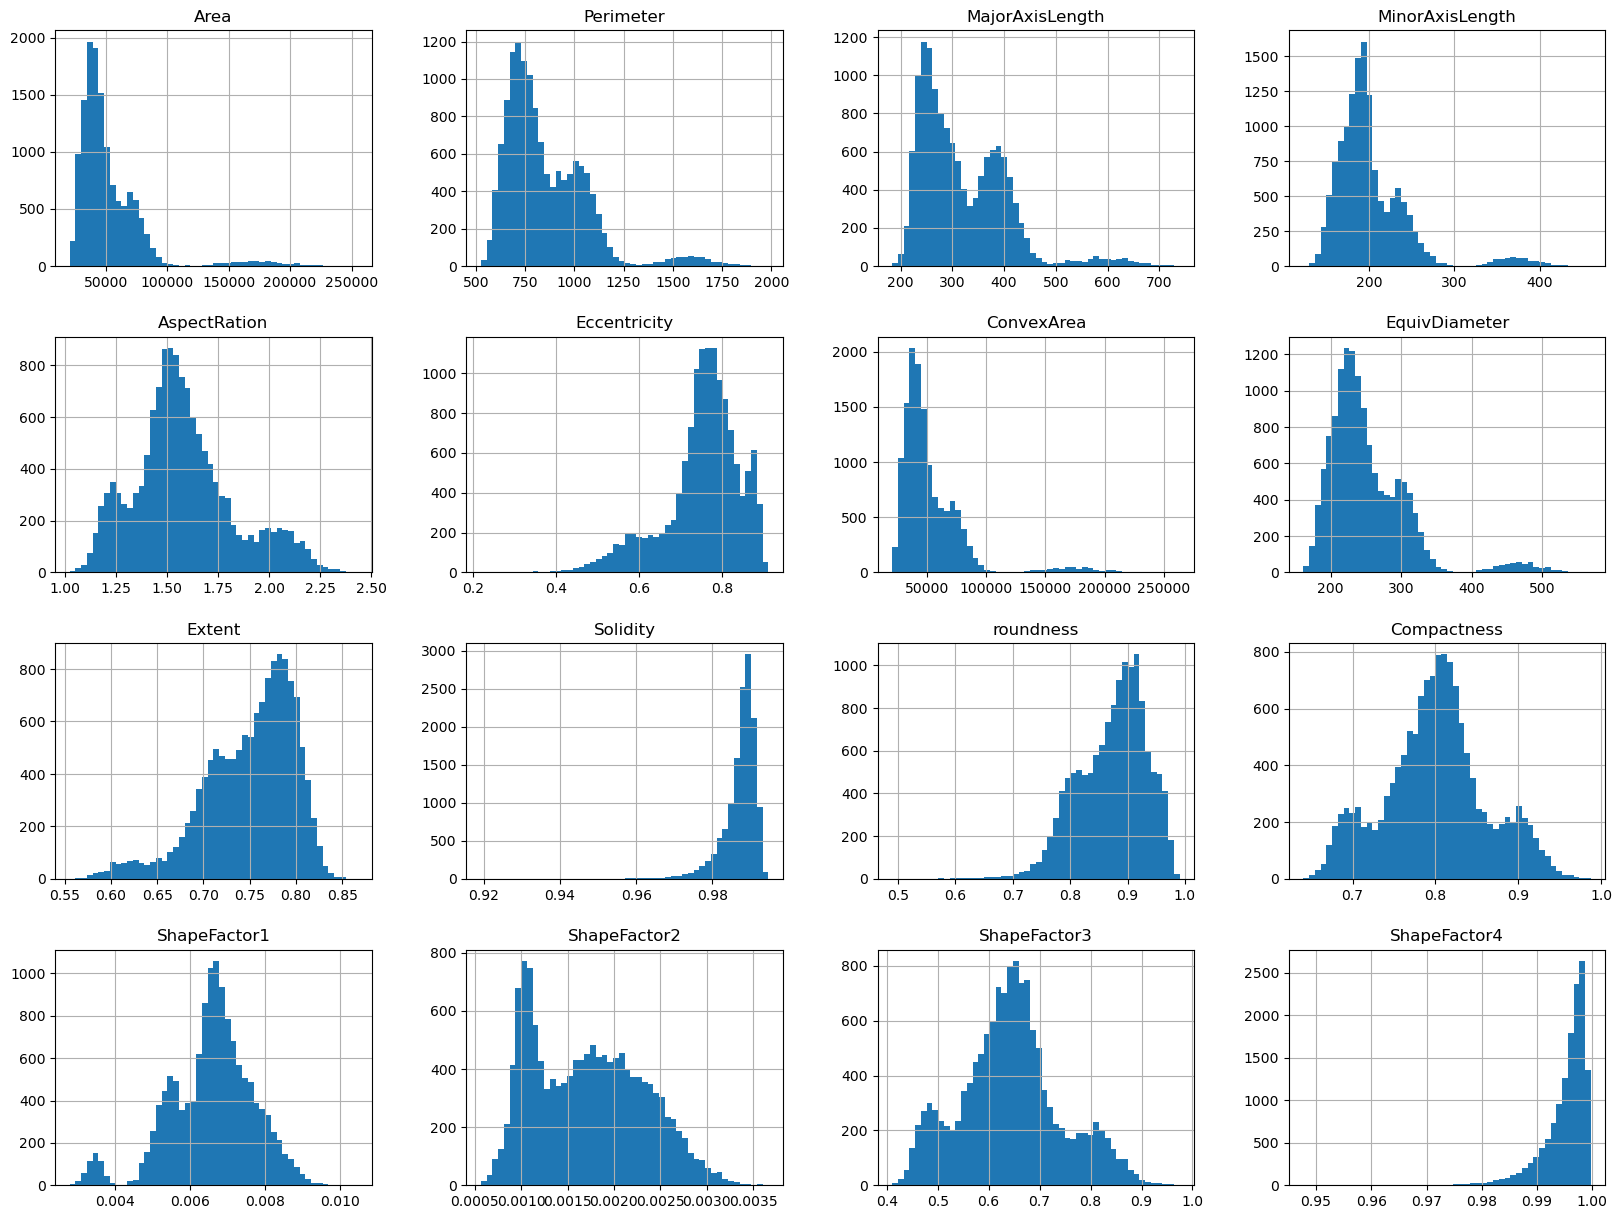

In [4]:
beans.hist(bins=50,figsize=(20,15))

In [5]:
beans.shape

(13611, 17)

In [6]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

The dataset I have chosen is about 13611 dry beans of 7 kinds. In the dataset we have retrieved 16 features from the dry beans.
Since the number of entries for all columns in our dataset is equal, we do not have to fill any NULL value points.<br> We have 14 float types, 2 int types and 1 class type with 4 classes.<br><br>

In [7]:
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Percentage of classes

In [8]:
class_perc = beans.Class.value_counts(normalize=True).to_frame()
class_perc["Class"] = class_perc["Class"] * 100 
class_perc

,Class
DERMASON,26.052458
SIRA,19.366689
SEKER,14.892366
HOROZ,14.165014
CALI,11.975608
BARBUNYA,9.712732
BOMBAY,3.835133


Label encoding the class category from string to numeric value

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
beans['Class']=le.fit_transform(beans.Class)
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


the classes are sorted alphabetically so barbunya is 0, bombay is 1, cali is 2, derma son is 3, horoz is 4, seker is 5, sira is 6

Examining the relations using correlation matrix

In [10]:
cmat = beans.corr()
for x in range(cmat.shape[0]):
    cmat.iloc[x,x] = 0.0 
cmat

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,0.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.475252
Perimeter,0.966722,0.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.507638
MajorAxisLength,0.931834,0.977338,0.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.455175
MinorAxisLength,0.951602,0.913179,0.826052,0.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.458492
AspectRation,0.241735,0.385276,0.550335,-0.009161,0.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,-0.116332
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,0.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,-0.200356
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,0.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.477459
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,0.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.481099
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,0.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.031184
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,0.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.321283


Paiwise correlation between features A and B

In [11]:
cmax  = cmat.abs().max().to_frame()
id_max = cmat.abs().idxmax().to_frame()
pair_corr = pd.merge(id_max,cmax, on = cmax.index)
pair_corr=pair_corr.sort_values('0_y', ascending=False)
pair_corr = pair_corr.rename(columns = {'key_0':'A', '0_x':'B', '0_y':'Relation ratio'})
pair_corr = pair_corr.reset_index().drop('index', axis=1)
pair_corr

,A,B,Relation ratio
0,Area,ConvexArea,0.999939
1,ConvexArea,Area,0.999939
2,Compactness,ShapeFactor3,0.998686
3,ShapeFactor3,Compactness,0.998686
4,EquivDiameter,Perimeter,0.991380
5,Perimeter,EquivDiameter,0.991380
6,AspectRation,Compactness,0.987687
7,Eccentricity,ShapeFactor3,0.981058
8,MajorAxisLength,Perimeter,0.977338
9,MinorAxisLength,Area,0.951602


# 2. Objectives


In this project, I will use various unsupervised learning algorithms on it like clustering, HAC, DBSCAN,etc to gain more information on our dataset and clean and retrieve more data from it.

# 3. Unsupervised learning algorithms


1)KMEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(beans)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.plot([1,2,3,4,5,6,7,8,9],inertia,marker='*')
plt.xlabel('K value')
plt.ylabel('inertia')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=8)
kmeans=kmeans.fit(beans)


In [ ]:
kmeans.inertia_


In [ ]:
beans['k-means'] = kmeans
beans.sample(10)

Above shows that the values are presemt in different clusters

In [ ]:
(beans[['Class','k-means']].groupby(['Class','k-means']).size().to_frame().rename(columns={0:'quantity'}))

where barbunya is 0, bombay is 1, cali is 2, derma son is 3, horoz is 4, seker is 5, sira is 6.<br><br><br>

2)HEIRARCHICAL AGGLOMERATIVE CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg= AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
agg= agg.fit(beans)
beans['out'] = agg.fit_predict(beans)

In [ ]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(agg.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z,p=50, truncate_mode='lastp',show_leaf_counts=True)

In [ ]:
(beans[['Class','out']].groupby(['Class','out']).size().to_frame().rename(columns={0:'quantity'}))

where barbunya is 0, bombay is 1, cali is 2, derma son is 3, horoz is 4, seker is 5, sira is 6

3) DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5, min_samples=11, metric='euclidean')
dbs = dbs.fit(beans)

In [ ]:
beans['dbscan'] = dbs.fit_predict(beans)

In [ ]:
(beans[['Class','dbscan']].groupby(['Class','dbscan']).size().to_frame().rename(columns={0:'quantity'}))

4)Mean shift algorithm

In [ ]:
from sklearn.cluster import MeanShift
ms  = MeanShift(bandwidth=2) 
ms = ms.fit(beans)

In [ ]:
beans['MeanShift'] = ms.fit_predict(beans4[float_columns])
(beans[['Class','MeanShift']].groupby(['Class','MeanShift']).size().to_frame().rename(columns={0:'beans'}))

# 4. Insights and key findings


When used to predict values, we get minimum accuracy from DBSCAN and HAC models. The accuracy of our KMeans algorithm and mean shift are better but for this specific problem Kmeans algorithm is the most accurate.

# 5. Next Steps


Mean shift and HAC are slow processes. K means was the quickest process and has given us the most accurate results among these 4 processes so I would chose K means for this dataset. However, there are improvements that need to be made to increase the accuracy of the process and some changes in the datset for better representation.

Also, I would like to have a similar dataset I could use for prediction since the accuracy of the model I have chosen is just oven 90% and hence can be improved. I would love to hear suggestions for how I should proceed with this task. Thankyou for reading this report.<br><br>

This is the end of the report made by me(Satwik Saurav) for Week 7 (final project) of Unsupervised Machine Learning course offered by IBM Skills Network on Coursera. Thank you for reading this report.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
